# Thermal loads

This example input file represents a single household user whose only load
is the "shower". The example showcases how to model thermal loads by means of
the thermal_P_var attribute.

In [1]:
# importing functions
from ramp import User,calc_peak_time_range,yearly_pattern
from ramp import load_data
import pandas as pd

### Creating a user category and appliances

In [2]:
household = User()

when the power is variant during the day, the "power" parameter needs to be passed as a pd.DataFrame or np.array with a daily profile (365 rows of data). For this exercise, data can be loaded from the default examples in ramp:

In [3]:
shower_power = load_data(example="shower")

<AxesSubplot:>

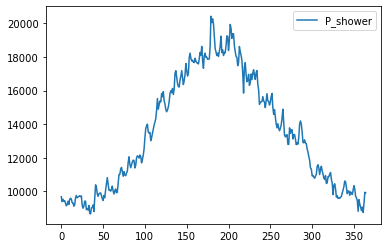

In [4]:
# shower power distribution
shower_power.plot()

In [5]:
shower = household.add_appliance(
    name = "Shower",
    number = 1,
    power  = shower_power,
    num_windows = 2,
    func_time = 15,
    time_fraction_random_variability = 0.1,
    func_cycle = 3,
    window_1 = [390,540],
    window_2 = [1080,1200],
    random_var_w = 0.2
)


### Generating profiles

In [6]:
peak_time_range = calc_peak_time_range(
    user_list = [household]
)
year_behaviour = yearly_pattern()

In [7]:
# generating the yearly profiles for different thermal_P_var

In [8]:
def thermal_P_var_sensitivity(values):
    
    # buidling a pd.DataFrame for saving sensitivity results
    results = pd.DataFrame(    
        index = pd.date_range(start = "2020-01-01",periods = 1440*365,freq="T"),
        columns = [f"P_var = {value}" for value in values]
    )
    
    for value in values:
        
        # changing the thermal_P_var
        household.thermal_P_var = value
        
        # creating a list to store profiles for all the years of the year
        profiles = []
        for day in range(365):

            profile = household.generate_single_load_profile(
                    prof_i = day, 
                    peak_time_range = peak_time_range,
                    day_type = year_behaviour[day]
                )

            profiles.extend(profile)
            
        # assiging the yearly profile for a given sensitivity case
        results[f"P_var = {value}"] = profiles
        
    return results

In [9]:
sensitivity_results = thermal_P_var_sensitivity([0,0.25,0.5,0.75,1])

In [10]:
sensitivity_results

,P_var = 0,P_var = 0.25,P_var = 0.5,P_var = 0.75,P_var = 1
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 00:01:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 00:02:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 00:03:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 00:04:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-12-30 23:55:00,0.0,0.0,0.0,0.0,0.0
2020-12-30 23:56:00,0.0,0.0,0.0,0.0,0.0
2020-12-30 23:57:00,0.0,0.0,0.0,0.0,0.0
2020-12-30 23:58:00,0.0,0.0,0.0,0.0,0.0


In [11]:
# showing the daily average of the load profiles
average_daily_profiles = sensitivity_results.resample("1d").mean()

<AxesSubplot:>

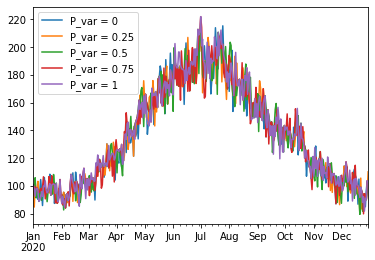

In [12]:
average_daily_profiles.plot()